# Plot of microplastics 

Data from: 
Dusza, H.M., Katrukha, E.A., Nijmeijer, S.M., Akhmanova, A., Vethaak, A.D., Walker, D.I. and Legler, J., 2022. Uptake, transport, and toxicity of pristine and weathered micro-and nanoplastics in human placenta cells. Environmental Health Perspectives, 130(9), p.097006.


In [1]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("/Users/lish/li.github/Li_CVK/lcvk")
from metModels import *
from polarPlot import *

In [3]:
pla = []
for line in open('../data/Dusza2021_Table_S3_.txt').readlines()[1:]:
    mz, rt, mode, name, formula = line.split('\t')
    formula = formula.rstrip().replace(' ', '')
    if 'C' in formula and 'H' in formula:
        hc, oc, nc, nops_c, ccs_offset = get_kvli_ratios(formula, 0) # not using ccs_offset for now
        pla.append(
            {
                'formula': formula,
                'ratio_H_C': hc,
                'ratio_O_C': oc,
                'ratio_N_C': nc,
                'ratio_NOPS': nops_c,
            }
        )
    else:
        pass

In [46]:

def plot_global_metabolites(allcpds, title='', outfile=''):
    '''Illustration only'''
    YMAX = 2.5
    min_radius=0
    max_radius=2.5
    theta_limit = (0.1*np.pi, 1.9*np.pi)
    theta_offset = 0.05         # so that nodes do not sit on border lines
    hcList = [max(min(x['ratio_H_C'], 2.5), 0.5) for x in allcpds]

    hcList = project_hc_data_radial(hcList)
    yList = [min(max(x['ratio_O_C'], min_radius), max_radius) 
             for x in allcpds]

    # ticks reverse function of standardize_data
    xlabels = [ 0.8, 1.1, 1.4, 1.7, 2, 2.3]
    xticks = project_hc_data_radial(xlabels)

    fig = plt.figure(figsize=(6, 6))
    ax = fig.subplots(subplot_kw={'projection': 'polar',  } 
    )
    c = ax.scatter(hcList, yList, marker='o', facecolors='w', 
                    linewidths=1, edgecolors='k', 
                    s=28,
    )
    
    for ii, cpd in enumerate(allcpds):
        if yList[ii] > 0.55:
            L = cpd['formula']
            if cpd['ratio_H_C'] < 1.7:
                ax.text(hcList[ii]+0.0, yList[ii] + 0.2, L, color='r',
                            fontsize=8, rotation=90, alpha=1)
            else:
                ax.text(hcList[ii]+0.0, yList[ii] + 0.2, L, color='r',
                            fontsize=8, rotation=0, alpha=1)
                
    ax.set_theta_zero_location('S')
    ax.set_theta_direction(-1)
    ax.set_thetalim((theta_limit[0]-theta_offset*2, theta_limit[1]+theta_offset))
    ax.set_ylim(0, YMAX + 0.1)
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(x) for x in xlabels])

    ax.set_rgrids([-0.5, 0.5, 1.5])
    ax.grid(color='r', linewidth=0.1)
    for p in ax.spines.values():
        # inner, polar, start, end
        p.set_color('r')
        p.set_linewidth(0.2)

    ax.set_rorigin(-1)
    ax.text(1.7, YMAX + .45, "H:C", )
    ax.text(1.96*np.pi, 1.6, "O:C", rotation=285)
    ax.set_title(title)
    plt.savefig(outfile, dpi=300)
    

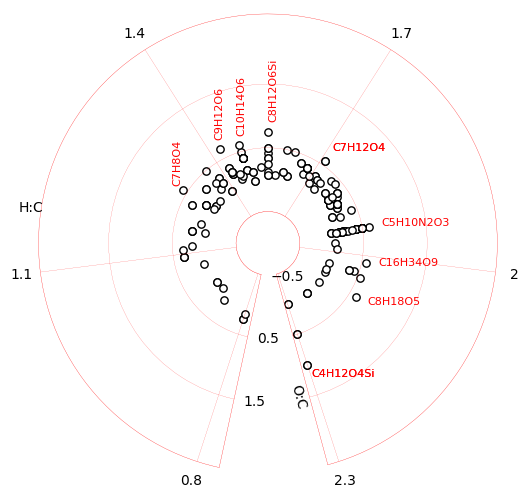

In [47]:
plot_global_metabolites(pla, title='', 
                        outfile='../output/plastic.pdf')